# Prediction of time series with a seasonal component

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.api import ExponentialSmoothing

In [20]:
# Load the data
co2 = pd.read_csv('./CO2_data.csv', index_col=0)
co2.index = pd.to_datetime(co2.index)
co2

,CO2
1995-01-31,315.42
1995-02-28,316.31
1995-03-31,316.50
1995-04-30,317.56
1995-05-31,318.13
...,...
2019-08-31,342.21
2019-09-30,339.69
2019-10-31,339.82
2019-11-30,340.98


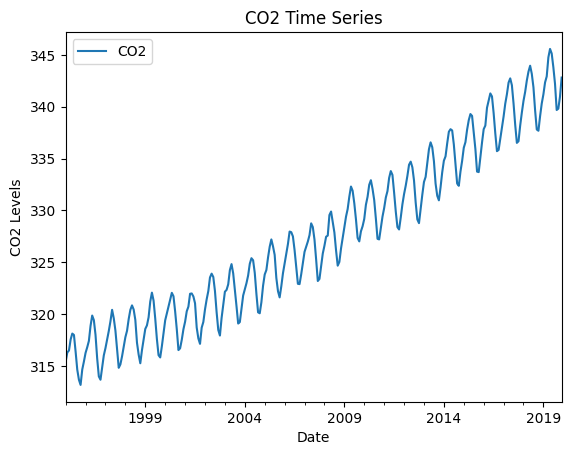

In [21]:
# Plot the time series
co2.plot(title='CO2 Time Series')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.show()
#here there is a trend and the seasonal component seems to follow an additive pattern(modele)

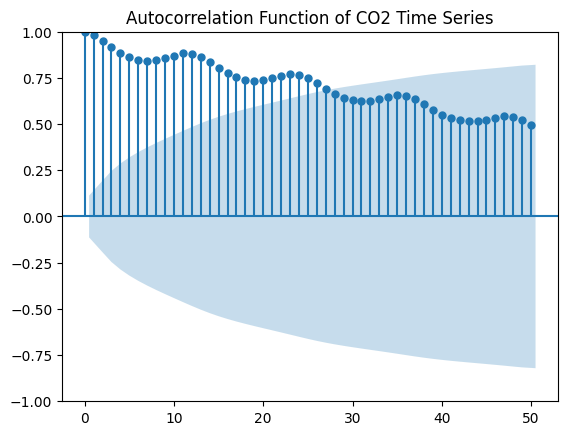

In [22]:
plot_acf(co2, lags=50)
plt.title('Autocorrelation Function of CO2 Time Series')
plt.show()

In [23]:
# Split the data into training and validation sets
co2_train = co2.iloc[:-48]
co2_validation = co2.iloc[-48:]

# Display the sizes of the training and validation sets
print(f"Training set size: {len(co2_train)}")
print(f"Validation set size: {len(co2_validation)}")

Training set size: 252
Validation set size: 48


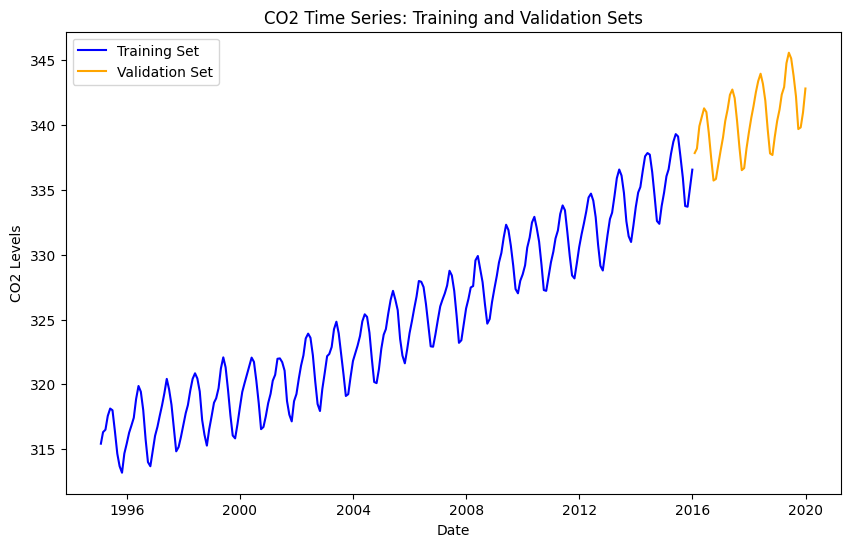

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.title('CO2 Time Series: Training and Validation Sets')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

In [25]:
# We will now apply the Triple Exponential Smoothing algorithm to the training data (additive model first)
# As you can see below, we need to indicate the length of the period in 'seasonal_periods', and 
# we specify sesaonal = 'add' for an additive model (trend will always be 'add' for us)
tes_model = ExponentialSmoothing(co2_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'add').fit()
tes_model.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Dep. Variable:,CO2,No. Observations:,252
Model:,ExponentialSmoothing,SSE,17.616
Optimized:,True,AIC,-638.477
Trend:,Additive,BIC,-582.007
Seasonal:,Additive,AICC,-635.542
Seasonal Periods:,12,Date:,"Wed, 02 Apr 2025"
Box-Cox:,False,Time:,10:16:36
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6505999,alpha,True
smoothing_trend,1.2672e-16,beta,True


In [26]:
# To see the evolution of the parameter a throughout the TES algorithm you can ask:
tes_model.level

1995-01-31    315.512758
1995-02-28    315.717139
1995-03-31    315.463010
1995-04-30    315.361893
1995-05-31    315.377133
                 ...    
2015-08-31    336.992013
2015-09-30    336.768899
2015-10-31    336.843752
2015-11-30    337.064224
2015-12-31    337.403737
Length: 252, dtype: float64

In [27]:
# To see the evolution of the parameter b throughout the TES algorithm you can ask:
tes_model.trend

1995-01-31    0.087251
1995-02-28    0.087251
1995-03-31    0.087251
1995-04-30    0.087251
1995-05-31    0.087251
                ...   
2015-08-31    0.087251
2015-09-30    0.087251
2015-10-31    0.087251
2015-11-30    0.087251
2015-12-31    0.087251
Length: 252, dtype: float64

In [28]:
# To see the evolution of the seasonal coefficients throughout the TES algorithm you can ask:
tes_model.season

1995-01-31   -0.097554
1995-02-28    0.529958
1995-03-31    1.220326
1995-04-30    2.299269
1995-05-31    2.791541
                ...   
2015-08-31   -1.146876
2015-09-30   -2.852220
2015-10-31   -3.137093
2015-11-30   -2.015770
2015-12-31   -0.979212
Length: 252, dtype: float64

In [29]:
tes_model.season[-12:]

2015-01-31   -0.097554
2015-02-28    0.529958
2015-03-31    1.220326
2015-04-30    2.299269
2015-05-31    2.791541
2015-06-30    2.230959
2015-07-31    0.854658
2015-08-31   -1.146876
2015-09-30   -2.852220
2015-10-31   -3.137093
2015-11-30   -2.015770
2015-12-31   -0.979212
dtype: float64

In [30]:
# Extract the last values of level, trend, and seasonal coefficients
last_level = tes_model.level[-1]
last_trend = tes_model.trend[-1]
last_seasonal = tes_model.season[-12:]

# Calculate the predictions for the first two points of the validation set
prediction_1 = last_level + last_trend * 1 + last_seasonal[0]
prediction_2 = last_level + last_trend * 2 + last_seasonal[1]

print(f"Prediction for the 1st point: {prediction_1}")
print(f"Prediction for the 2nd point: {prediction_2}")

Prediction for the 1st point: 337.3934341904436
Prediction for the 2nd point: 338.10819699106173


C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_level = tes_model.level[-1]
C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_trend = tes_model.trend[-1]
C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction_1 = last_level + last_trend *

In [31]:
# These predictions can be obtained by the following command : 
tes_model.forecast(2)

2016-01-31    337.393434
2016-02-29    338.108197
Freq: ME, dtype: float64

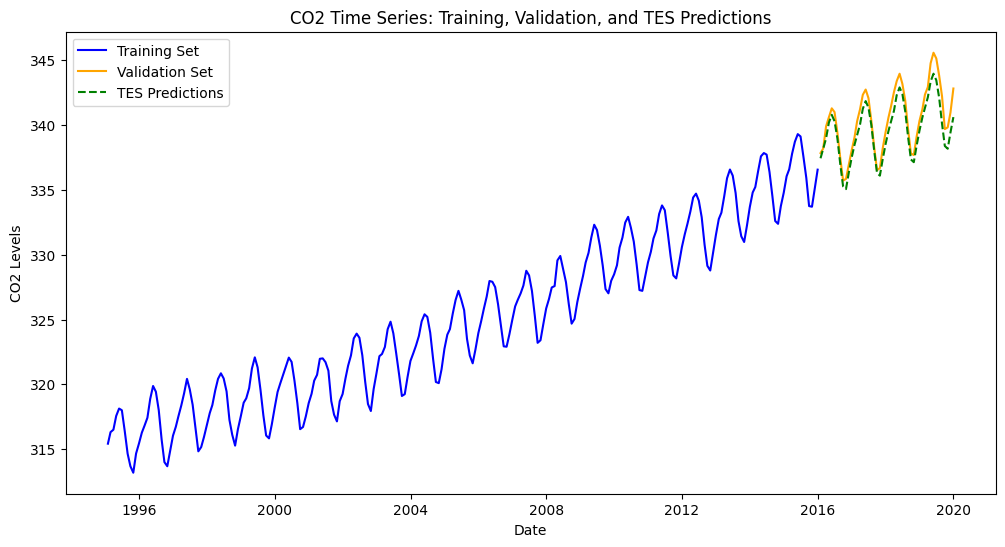

Squared Prediction Error on Validation Set: 49.90946735710566


In [35]:
# Compute predictions for the whole validation set
validation_predictions = tes_model.forecast(len(co2_validation))

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, validation_predictions, label='TES Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and TES Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
squared_error = np.sum((co2_validation['CO2'] - validation_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set: {squared_error}")

In [34]:
# We will now try a model with a multiplicative seasonal composant. 
# For this, you need to specify seasonal = 'mul' in the call of the Exponenatial smoothing function : 
tes_model = ExponentialSmoothing(co2_train, initialization_method='estimated',seasonal_periods=12, trend = 'add', seasonal = 'mul').fit()
tes_model.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


Dep. Variable:,CO2,No. Observations:,252
Model:,ExponentialSmoothing,SSE,17.300
Optimized:,True,AIC,-643.040
Trend:,Additive,BIC,-586.569
Seasonal:,Multiplicative,AICC,-640.104
Seasonal Periods:,12,Date:,"Wed, 02 Apr 2025"
Box-Cox:,False,Time:,10:20:02
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6310383,alpha,True
smoothing_trend,1.9337e-14,beta,True


In [36]:
# Extract the last values of level, trend, and seasonal coefficients
last_level = tes_model.level[-1]
last_trend = tes_model.trend[-1]
last_seasonal = tes_model.season[-12:]

# Calculate the predictions for the first two points of the validation set
prediction_1 = last_level + last_trend * 1 + last_seasonal[0]
prediction_2 = last_level + last_trend * 2 + last_seasonal[1]

print(f"Prediction for the 1st point: {prediction_1}")
print(f"Prediction for the 2nd point: {prediction_2}")

Prediction for the 1st point: 340.913461863942
Prediction for the 2nd point: 341.00334995588156


C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_level = tes_model.level[-1]
C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  last_trend = tes_model.trend[-1]
C:\Users\PC\AppData\Local\Temp\ipykernel_23368\3839974822.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction_1 = last_level + last_trend *

In [37]:
# These predictions can be obtained by the command:
tes_model.forecast(2)

2016-01-31    337.436552
2016-02-29    338.176168
Freq: ME, dtype: float64

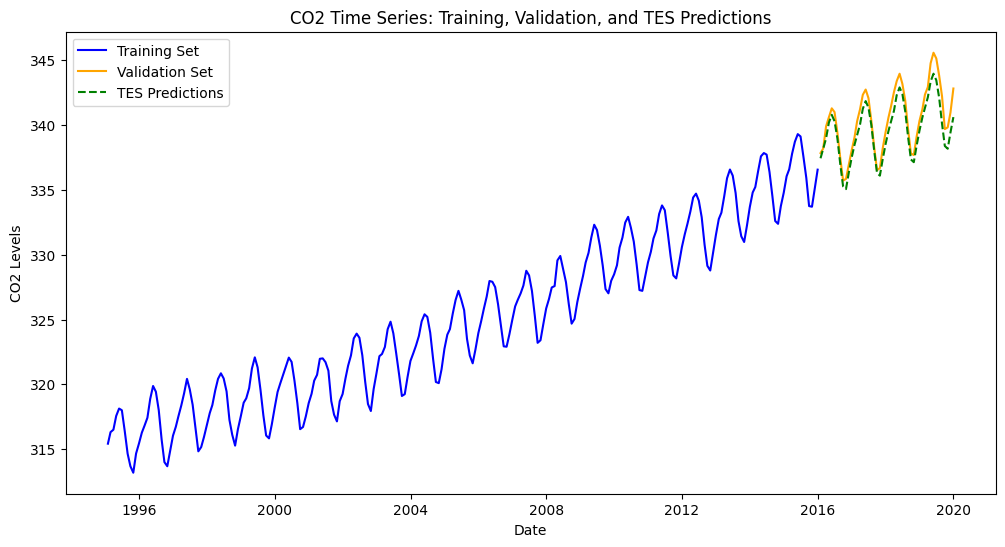

Squared Prediction Error on Validation Set: 49.90946735710566


In [38]:
# Compute predictions for the whole validation set
validation_predictions = tes_model.forecast(len(co2_validation))

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, validation_predictions, label='TES Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and TES Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
squared_error = np.sum((co2_validation['CO2'] - validation_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set: {squared_error}")

## Classical AutoRegressive models (no trend no season)

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

Best order: 18 with AIC: 158.1616589664124


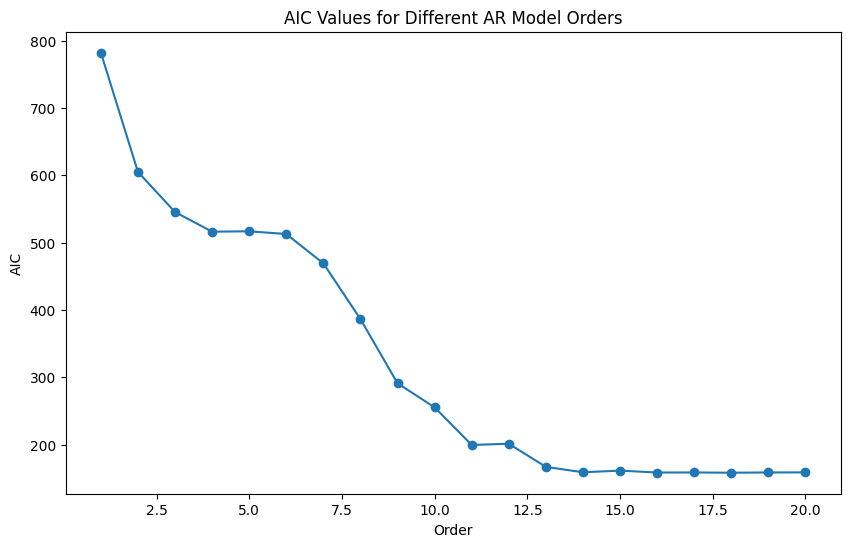

In [39]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tools.eval_measures import aic

# Try different orders for the AR model
aic_values = []
orders = range(1, 21)  # Test AR models with orders from 1 to 20

for order in orders:
    model = AutoReg(co2_train['CO2'], lags=order).fit()
    aic_values.append((order, model.aic))

# Find the order with the lowest AIC
best_order = min(aic_values, key=lambda x: x[1])
print(f"Best order: {best_order[0]} with AIC: {best_order[1]}")

# Plot AIC values for different orders
orders, aic_scores = zip(*aic_values)
plt.figure(figsize=(10, 6))
plt.plot(orders, aic_scores, marker='o')
plt.title('AIC Values for Different AR Model Orders')
plt.xlabel('Order')
plt.ylabel('AIC')
plt.show()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


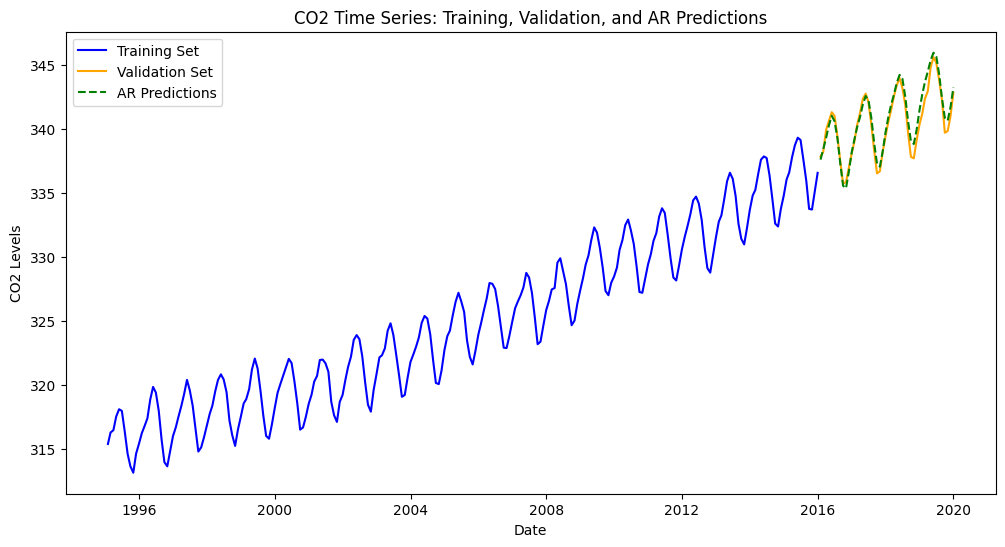

Squared Prediction Error on Validation Set: 19.730364097568298


In [40]:
# Apply the selected AR model to predict the whole validation data
ar_model = AutoReg(co2_train['CO2'], lags=best_order[0]).fit()
ar_predictions = ar_model.predict(start=co2_validation.index[0], end=co2_validation.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, ar_predictions, label='AR Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and AR Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ar_squared_error = np.sum((co2_validation['CO2'] - ar_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set: {ar_squared_error}")

## AutoRegressive models with trend

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


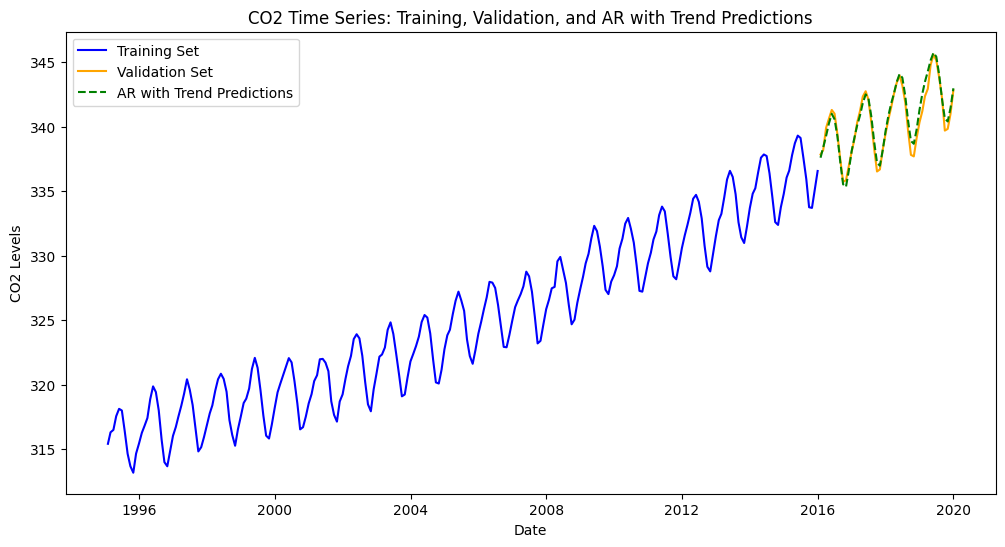

Squared Prediction Error on Validation Set (AR with Trend): 14.487317191760496


In [41]:
# Fit an AR model with trend
ar_trend_model = AutoReg(co2_train['CO2'], lags=best_order[0], trend='t').fit()

# Predict the whole validation data
ar_trend_predictions = ar_trend_model.predict(start=co2_validation.index[0], end=co2_validation.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, ar_trend_predictions, label='AR with Trend Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and AR with Trend Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ar_trend_squared_error = np.sum((co2_validation['CO2'] - ar_trend_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set (AR with Trend): {ar_trend_squared_error}")

## AutoRegressive models with seasonal component

In [42]:
# We will now apply a seasonal AR model of order 1 without trend (to start):
# For this, you need to specify seasonal = True and to indicate the period of the seasonal component (12 here)
ARS = AutoReg(co2_train, lags = 1, trend = 'c',seasonal=True, period = 12).fit()
ARS.summary()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                    CO2   No. Observations:                  252
Model:               Seas. AutoReg(1)   Log Likelihood                 -35.315
Method:               Conditional MLE   S.D. of innovations              0.279
Date:                Wed, 02 Apr 2025   AIC                             98.629
Time:                        10:38:14   BIC                            147.986
Sample:                    02-28-1995   HQIC                           118.491
                         - 12-31-2015                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1829      0.910      0.201      0.841      -1.601       1.967
s(2,12)       -0.2615      0.087     -3.005      0.003      -0.432      -0.091
s(3,12)       -0.2004      0.087     -2.301      0.021      -0.371      -0.030
s(4,12)        0.1863      0.087      2.136      0.033       0.015       0.357
s(5,12)       -0.4033      0.087     -4.610      0.000      -0.575      -0.232
s(6,12)       -1.4575      0.088    -16.627      0.000      -1.629      -1.286
s(7,12)       -2.2721      0.088    -25.964      0.000      -2.444      -2.101
s(8,12)       -2.8942      0.087    -33.189      0.000      -3.065      -2.723
s(9,12)       -2.5933      0.087    -29.800      0.000      -2.764      -2.423
s(10,12)      -1.1689      0.087    -13.415      0.000      -1.340      -0.998
s(11,12)       0.2378      0.087      2.728      0.006       0.067       0.409
s(12,12)       0.1501      0.087      1.724      0.085      -0.021       0.321
CO2.L1         1.0024      0.003    357.539      0.000       0.997       1.008
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9976           +0.0000j            0.9976            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
To determine the number of parameters estimated for the seasonal AutoRegressive model (ARS), we need to consider the following:

1. **AR Coefficients**: The number of lags specified in the model (order of the AR model).
2. **Seasonal Coefficients**: The number of seasonal coefficients, which is equal to the period of the seasonal component minus one (since the first seasonal coefficient is fixed to 0 in this implementation).
3. **Intercept**: If the model includes a constant term (`trend='c'`), one parameter is estimated for the intercept.

For the ARS model in this notebook:
- The order of the AR model is 1 (as specified in the code).
- The seasonal period is 12, so there are 11 seasonal coefficients.
- The model includes a constant term.

Thus, the total number of parameters estimated is:
1 (AR coefficient) + 11 (seasonal coefficients) + 1 (intercept) = **13 parameters**.

In [44]:
# Predict the first two points of the validation data
ars_prediction_1, ars_prediction_2 = ARS.forecast(2)

print(f"Prediction for the 1st point: {ars_prediction_1}")
print(f"Prediction for the 2nd point: {ars_prediction_2}")

Prediction for the 1st point: 337.56597702584975
Prediction for the 2nd point: 338.3128919482162


d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [45]:
#These values can be obtained by the following command:
ARS.forecast(2)

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2016-01-31    337.565977
2016-02-29    338.312892
Freq: ME, dtype: float64

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred freq

Best ARS order: 10 with AIC: 61.18152138624783


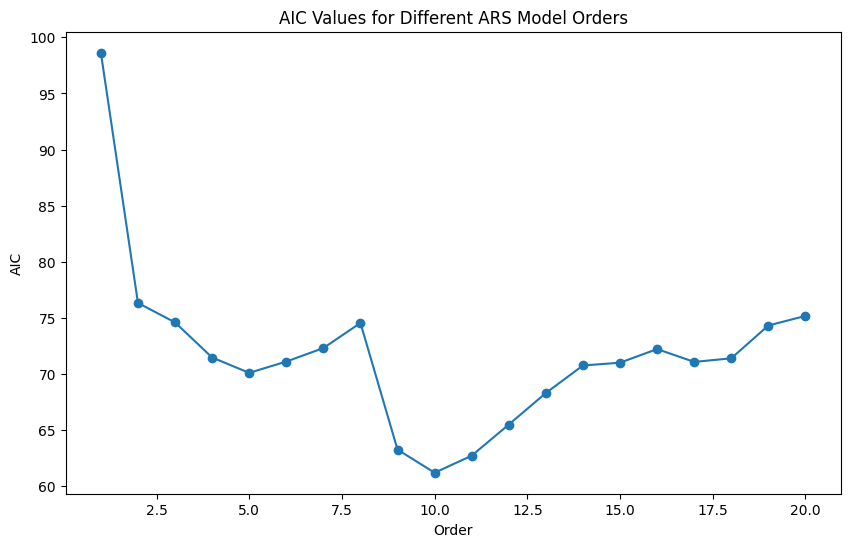

In [46]:
# Try different orders for the seasonal AR model
ars_aic_values = []
orders = range(1, 21)  # Test ARS models with orders from 1 to 20

for order in orders:
    ars_model = AutoReg(co2_train['CO2'], lags=order, seasonal=True, period=12).fit()
    ars_aic_values.append((order, ars_model.aic))

# Find the order with the lowest AIC
best_ars_order = min(ars_aic_values, key=lambda x: x[1])
print(f"Best ARS order: {best_ars_order[0]} with AIC: {best_ars_order[1]}")

# Plot AIC values for different orders
ars_orders, ars_aic_scores = zip(*ars_aic_values)
plt.figure(figsize=(10, 6))
plt.plot(ars_orders, ars_aic_scores, marker='o')
plt.title('AIC Values for Different ARS Model Orders')
plt.xlabel('Order')
plt.ylabel('AIC')
plt.show()

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


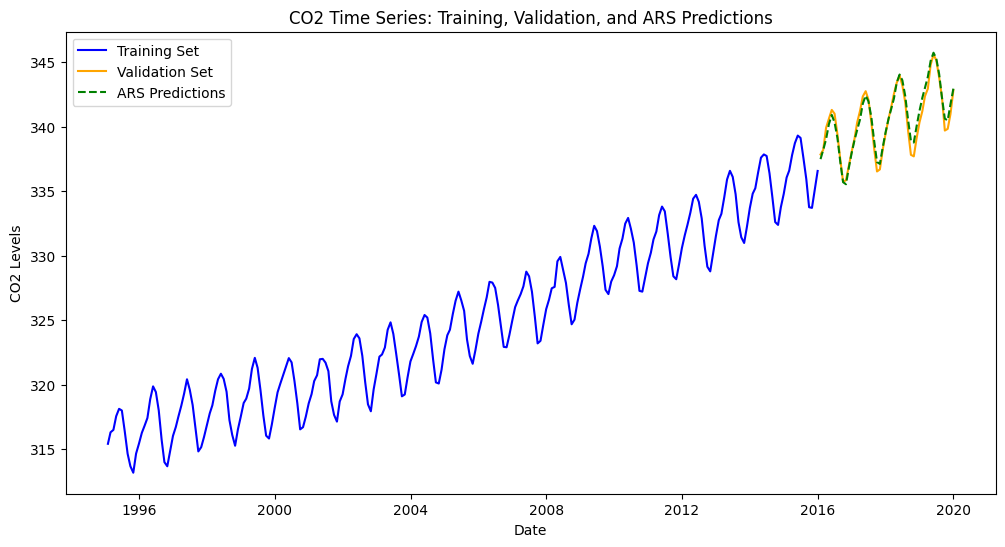

Squared Prediction Error on Validation Set (ARS): 14.06340637965874


In [47]:
# Apply the selected ARS model to predict the whole validation data
ars_model = AutoReg(co2_train['CO2'], lags=best_ars_order[0], seasonal=True, period=12).fit()
ars_predictions = ars_model.predict(start=co2_validation.index[0], end=co2_validation.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, ars_predictions, label='ARS Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and ARS Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ars_squared_error = np.sum((co2_validation['CO2'] - ars_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set (ARS): {ars_squared_error}")

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:441: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


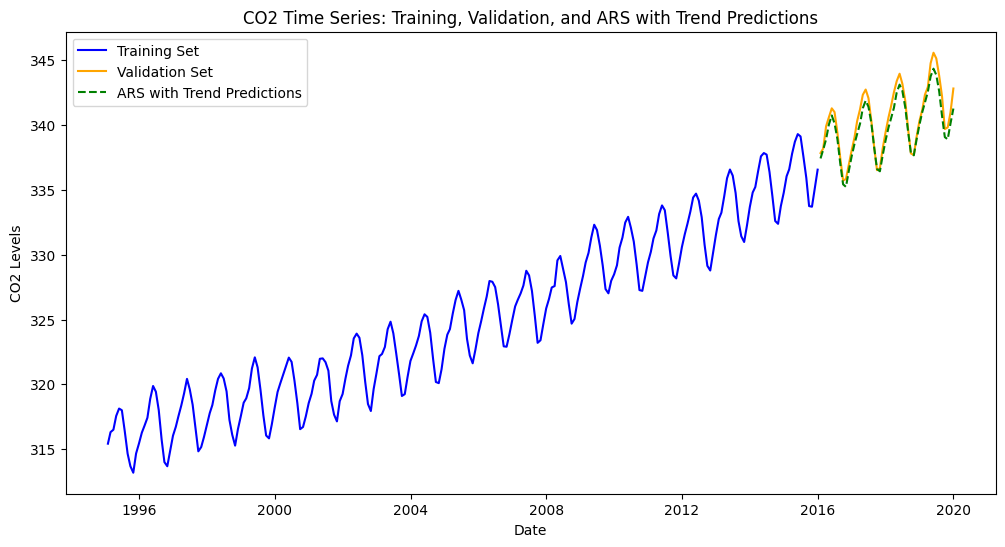

Squared Prediction Error on Validation Set (ARS with Trend): 27.24396825463725


In [48]:
# Fit a seasonal AR model with a trend
ars_trend_model = AutoReg(co2_train['CO2'], lags=best_ars_order[0], trend='t', seasonal=True, period=12).fit()

# Predict the whole validation data
ars_trend_predictions = ars_trend_model.predict(start=co2_validation.index[0], end=co2_validation.index[-1])

# Plot the training, validation data, and predictions
plt.figure(figsize=(12, 6))
plt.plot(co2_train.index, co2_train['CO2'], label='Training Set', color='blue')
plt.plot(co2_validation.index, co2_validation['CO2'], label='Validation Set', color='orange')
plt.plot(co2_validation.index, ars_trend_predictions, label='ARS with Trend Predictions', color='green', linestyle='--')
plt.title('CO2 Time Series: Training, Validation, and ARS with Trend Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Compute the squared prediction error on the validation set
ars_trend_squared_error = np.sum((co2_validation['CO2'] - ars_trend_predictions) ** 2)
print(f"Squared Prediction Error on Validation Set (ARS with Trend): {ars_trend_squared_error}")

d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
d:\Master1\MPC\TP\tp1\mon_env\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\Users\PC\AppData\Local\Temp\ipykernel_23368\2133367784.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_index = pd.date_range(start=co2.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')


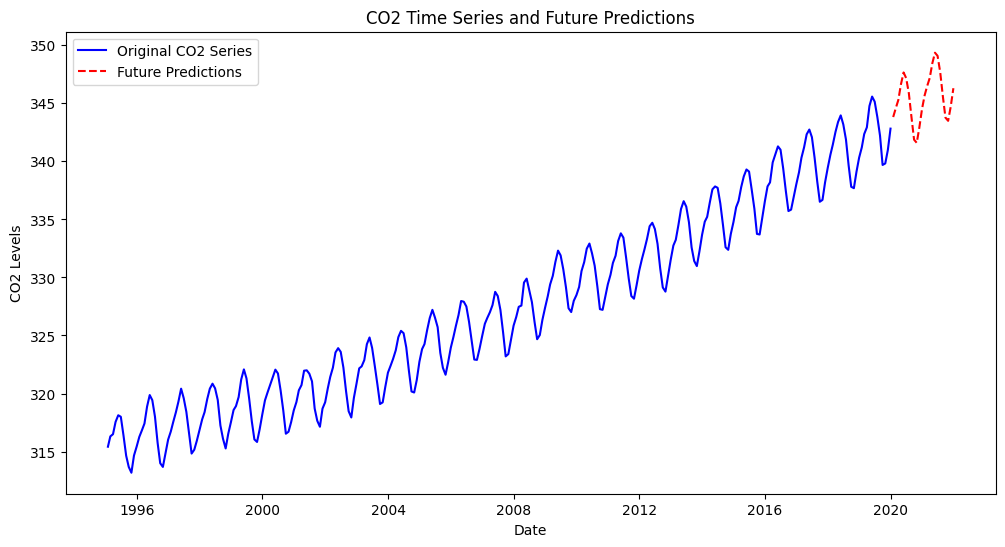

Future Predictions:
2020-01-31    343.817314
2020-02-29    344.550000
2020-03-31    345.289333
2020-04-30    346.628460
2020-05-31    347.657166
2020-06-30    347.169719
2020-07-31    345.876054
2020-08-31    343.790099
2020-09-30    341.870624
2020-10-31    341.592588
2020-11-30    342.903106
2020-12-31    344.498149
2021-01-31    345.692493
2021-02-28    346.454363
2021-03-31    347.182331
2021-04-30    348.440453
2021-05-31    349.357746
2021-06-30    349.091795
2021-07-31    347.670161
2021-08-31    345.578259
2021-09-30    343.766570
2021-10-31    343.491036
2021-11-30    344.710426
2021-12-31    346.300933
Freq: ME, dtype: float64


In [49]:
# Fit the best AR model to the entire CO2 series
best_ar_model = AutoReg(co2['CO2'], lags=best_order[0]).fit()

# Predict the next 24 values
future_predictions = best_ar_model.predict(start=len(co2), end=len(co2) + 23)

# Plot the original CO2 series and the predictions
plt.figure(figsize=(12, 6))
plt.plot(co2.index, co2['CO2'], label='Original CO2 Series', color='blue')
future_index = pd.date_range(start=co2.index[-1] + pd.DateOffset(months=1), periods=24, freq='M')
plt.plot(future_index, future_predictions, label='Future Predictions', color='red', linestyle='--')
plt.title('CO2 Time Series and Future Predictions')
plt.xlabel('Date')
plt.ylabel('CO2 Levels')
plt.legend()
plt.show()

# Display the predicted values
print("Future Predictions:")
print(future_predictions)